# Distance Traveled Visualization Book

In [32]:
# Dependencies
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox



## Set the Size and Aspect Ratio of the Plots
set_fig_size = (10,10)

label_size = 16

path_to_school_info = os.path.join('..', 'data', 'arena_school_info.csv')  
school_info = pd.read_csv(path_to_school_info) # Load the school data including logo path into a dataframe

path_to_team_table = os.path.join('..', 'data', 'output', 'team_travel_summary_final_v1.csv')
team_df = pd.read_csv(path_to_team_table)

path_to_conf_table = os.path.join(os.getcwd(), '..', 'data', 'output', 'conference_travel_stats_v1.csv')
conf_df = pd.read_csv(path_to_conf_table)

##################### CONSTANT PATHS
logo_folder = os.path.join(os.getcwd(), '..', 'images', 'logos', 'conference')
print(os.listdir(logo_folder)) # print directory
## TEMP DIR - IMAGES SUB FOLDER
temp_folder = os.path.join('..', 'TEMP', 'IMAGES')
# print(os.listdir(temp_folder)) # print
img_folder = os.path.join('..', 'TEMP', 'IMAGES')


# team_df.head()
# conf_df.head(6)

['atlantic.png', 'big_ten.png', 'ccha.png', 'ecac.png', 'ecac_large.png', 'ecac_scaled.png', 'hockey_east.png', 'hockey_east_2.png', 'independent.png', 'independent_2.png', 'independent_scaled.png', 'ncaa_1.png', 'ncaa_2.png', 'nchc.png', 'nchc_2.png']


## Conference Comparison Plot

In [33]:

def add_logos_to_plot(data_df, x_col, logo_mapping, logo_folder, ax, conferences):
    for conference in conferences:
        conference_data = data_df[data_df['Conference'] == conference]
        if not conference_data.empty:
            x = conference_data[x_col].values[0]
            logo_filename = logo_mapping.get(conference)
            if logo_filename:
                logo_path = os.path.join(logo_folder, logo_filename)
                if os.path.exists(logo_path):
                    try:
                        logo_img = Image.open(logo_path)
                        imagebox = OffsetImage(logo_img, zoom=0.175)  # Adjust zoom as needed
                        ab = AnnotationBbox(
                            imagebox,
                            (x, -0.05),  # Position logos just below the x-axis
                            frameon=False,
                            xycoords=('data', 'axes fraction'),  # Relative to axes, not data
                            boxcoords="offset points",
                            pad=0
                        )
                        ax.add_artist(ab)
                    except Exception as e:
                        print(f"Error adding logo for {conference}: {e}")
                else:
                    print(f"Logo file not found for {conference}: {logo_path}")
            else:
                print(f"No logo mapping found for conference: {conference}")


# Main plotting function
def plot_average_road_trip(conf_df, logo_mapping, logo_folder, img_folder=None, temp_folder=None):
    """
    Plots the average non-conference and conference road trip distances for each conference with enhanced styling,
    including conference logos.
    """
    
    # Ensure necessary columns exist
    required_columns = {'Conference', 'non_con_AVG', 'con_AVG'}
    if not required_columns.issubset(conf_df.columns):
        raise ValueError(f"DataFrame must contain columns: {required_columns}")

    # Define bar width and positions
    bar_width = 0.45
    indices = np.arange(len(conf_df['Conference']))
    
    # Add a temporary column for x positions
    conf_df['x_position'] = indices

    # Create a figure and axis with a square aspect ratio
    fig, ax = plt.subplots(figsize=set_fig_size)  # 1:1 aspect ratio
    
    # Define color palette
    colors = ['#4C72B0', '#55A868']  # Custom colors
    
    # Plot bars
    bars1 = ax.bar(indices - bar_width/2, conf_df['non_con_AVG'], width=bar_width, color=colors[0], edgecolor='grey', label='Avg Non-Conference Road Trip')
    bars2 = ax.bar(indices + bar_width/2, conf_df['con_AVG'], width=bar_width, color=colors[1], edgecolor='grey', label='Avg Conference Road Trip')

    # # Add annotations inside the bars with rotated text
    # for bar in bars1 + bars2:
    #     height = bar.get_height()
    #     ax.text(
    #         bar.get_x() + bar.get_width() / 2,  # Center the text horizontally
            
    #         30, # set the text to start just above the x axis at a consistent height
            
    #         # height - (0.85 * height),  # Move the text inside the bar (5% of the height down)
    #         # f'{height:.1f}',  # Format the text to one decimal place
    #         f'{height:.1f}',  # Format the text to no decimal place
    #         ha='center', 
    #         va='bottom',  # Vertically center the text inside the bar
    #         rotation=90,  # Rotate the text 90 degrees counter-clockwise
    #         fontsize=16,  # Slightly increase the font size
    #         # fontweight='bold',
    #         color='white'  # Change the text color to white for better contrast
    #     )
    ############# NEW OPTION ################
    # Set a static y-limit
    ax.set_ylim(0, 900)  # Set the y-limit based on your data range

    # Add annotations with arrows for bars that exceed the y-limit
    for bar in bars1 + bars2:
        height = bar.get_height()
        
        if height > 900:  # If the bar exceeds the y-limit
            # Add an arrow indicator
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                825,  # Place arrow at the y-limit
                '↑',  # Use an upward arrow as the marker
                ha='center', 
                va='bottom', 
                fontsize=50,  # Make the arrow large and visible
                fontweight='bold',
                color='red'  # Choose a color that stands out
            )
            
            # Add a numerical annotation just below the arrow
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                700,  # Place the value just below the y-limit
                f'{height:.1f}',  # Show the exact value of the bar
                ha='center', 
                va='bottom', 
                fontsize=20,
                rotation=90,  # Rotate the text for better visibility
                fontweight='bold',
                color='white'
            )
        else:
            # Normal annotations for bars within the limit
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                15,
                f'{height:.1f}', 
                ha='center', 
                va='bottom', 
                rotation=90, 
                fontsize=20,
                # fontweight='bold',
                color='white'
            )

    
    # Set title with enhanced styling
    ax.set_title('Average Road Trip Distance by Conference', fontsize=24, fontweight='bold', pad=20)
    
    # Set x and y labels with font styling
    ax.set_xlabel('Conference', fontsize=20, fontweight='bold')
    ax.set_ylabel('Average Distance (Miles)', fontsize=20, fontweight='bold')
    
    # Customize x-axis ticks
    ax.set_xticks([])
    # empty x labels
    ax.set_xticklabels([])

    # Apply a logarithmic scale to the y-axis
    # ax.set_yscale('log')

    # Remove x title
    ax.set_xlabel('')
    
    # Add grid lines
    ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.3)
    
    # Remove spines for a cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Customize legend with increased font size
    # ax.legend(title='', fontsize=18, loc='upper left')
    # Customize legend labels
    ax.legend(title='Trip Type', title_fontsize=16, fontsize=18, loc='upper left', labels=['Non-Conference', 'Conference'])
    
    ###### ORIGINAL Y LIMITS
    # Adjust y-limits to make space for logos below
    # ax.set_ylim(0, conf_df[['non_con_AVG', 'con_AVG']].values.max() + 50)  # Added space below for logos

    # Adjust y-limits so the bars for non independest conferences are not too close to the x-axis
    # Rescale y-axis to better fit the range of values, but might truncate tall bars
    # ax.set_ylim(0, 900)  # Adjust this value depending on your data range
#########################################################
    
    # Add conference logos below the x-ticks
    add_logos_to_plot(
        data_df=conf_df,
        x_col='x_position',
        logo_mapping=logo_mapping,
        logo_folder=logo_folder,
        ax=ax,
        conferences=conf_df['Conference'].tolist()
    )
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Save the plot if paths are provided
    if img_folder and temp_folder:
        os.makedirs(img_folder, exist_ok=True)
        os.makedirs(temp_folder, exist_ok=True)
        plt.savefig(os.path.join(temp_folder, 'average_road_trip.png'), dpi=300, bbox_inches='tight')
        plt.savefig(os.path.join(img_folder, 'average_road_trip.png'), dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.show()


# Example usage:

# # Define DataFrame with conference information
# conf_df = pd.DataFrame({
#     'Conference': ['Atlantic', 'Big Ten', 'CCHA', 'ECAC', 'Hockey East', 'NCHC', 'Independents'],
#     'non_con_AVG': [150.5, 200.3, 180.2, 160.4, 170.6, 190.1, 175.0],
#     'con_AVG': [100.2, 120.5, 110.3, 115.4, 130.7, 125.6, 105.8]
# })

# Define logo mapping: Conference name to logo filename
logo_mapping = {
    'atlantic': 'atlantic.png',
    'big_ten': 'big_ten.png',
    'ccha': 'ccha.png',
    'ecac': 'ecac_scaled.png',
    'hockey_east': 'hockey_east.png',
    'nchc': 'nchc.png',
    'independents': 'independent_scaled.png'
}

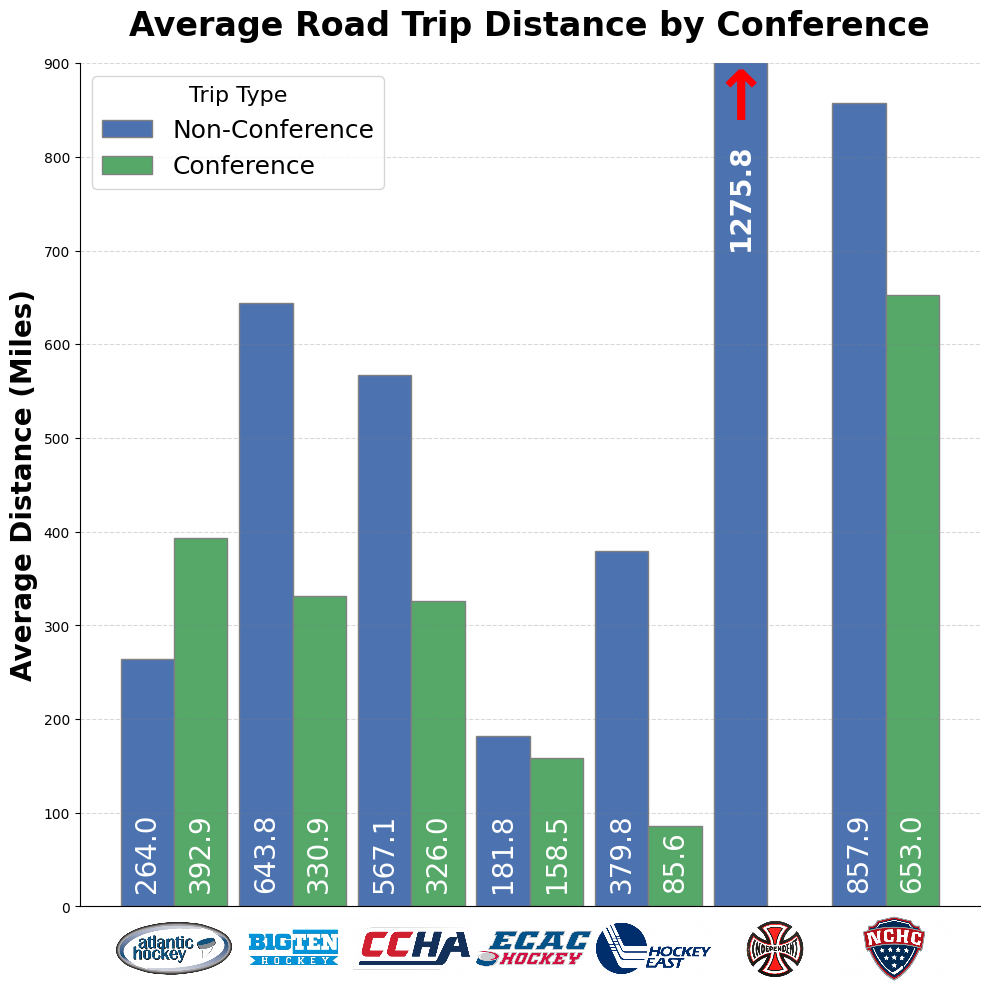

In [34]:

# Call the plotting function
plot_average_road_trip(conf_df, logo_mapping, logo_folder, img_folder, temp_folder)


## Team Plots

### INITIAL 3 BAR PLOT - 

In [35]:
# import matplotlib.pyplot as plt
# from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# import numpy as np

# # Function to create a similar plot but for individual teams with logos
# def plot_team_travel(data_df, school_info_df, logo_folder, title, top=True, num_teams=8):
#     """
#     Plots average travel distances (conference, non-conference, neutral) for individual teams with their logos.
    
#     Parameters:
#     - data_df: DataFrame containing team travel data.
#     - school_info_df: DataFrame containing team logo file information.
#     - logo_folder: Path to the folder containing team logos.
#     - title: The title for the plot.
#     - top: Boolean, if True plot the top teams with most travel, if False plot the bottom teams.
#     - num_teams: Number of teams to include in the plot (default is 8).
#     """
#     # Sort data by total travel (sum of con_AVG, non_con_AVG, and N_AVG)
#     data_df['Total_AVG'] = data_df['con_AVG'] + data_df['non_con_AVG'] + data_df['N_AVG']
#     sorted_df = data_df.sort_values(by='Total_AVG', ascending=not top).head(num_teams)
    
#     # Create a figure and axis with the same style as before
#     fig, ax = plt.subplots(figsize=set_fig_size)  # Adjust size to fit 8 teams
    
#     # Define bar width and positions
#     bar_width = 0.2
#     indices = np.arange(len(sorted_df['Team']))
    
#     # Plot bars for each travel type
#     bars1 = ax.bar(indices - bar_width, sorted_df['non_con_AVG'], width=bar_width, color='#4C72B0', edgecolor='grey', label='Non-Conference')
#     bars2 = ax.bar(indices, sorted_df['con_AVG'], width=bar_width, color='#55A868', edgecolor='grey', label='Conference')
#     bars3 = ax.bar(indices + bar_width, sorted_df['N_AVG'], width=bar_width, color='#FFA07A', edgecolor='grey', label='Neutral Site')
    
#     # Add annotations above the bars
#     for bars in [bars1, bars2, bars3]:
#         for bar in bars:
#             height = bar.get_height()
#             ax.text(
#                 bar.get_x() + bar.get_width() / 2,
#                 height + 5,
#                 f'{height:.1f}',
#                 ha='center',
#                 va='bottom',
#                 fontsize=10,
#                 fontweight='bold',
#                 color='black'
#             )
    
#     # Set title with enhanced styling
#     ax.set_title(title, fontsize=24, fontweight='bold', pad=20)
    
#     # Set x and y labels
#     ax.set_xlabel('Team', fontsize=16, fontweight='bold')
#     ax.set_ylabel('Average Distance (Miles)', fontsize=16, fontweight='bold')
    
#     # Customize x-axis ticks
#     ax.set_xticks(indices)
#     ax.set_xticklabels(sorted_df['Team'], fontsize=14, rotation=45, ha='right')
    
#     # Add grid lines
#     ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.3)
    
#     # Remove spines for a cleaner look
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
    
#     # Customize legend with increased font size
#     ax.legend(title='Trip Type', title_fontsize=18, fontsize=14, loc='upper left')
    
#     # Add team logos below the x-ticks
#     for i, team in enumerate(sorted_df['Team']):
#         # Get the logo filename from school_info_df
#         logo_info = school_info_df[school_info_df['Team'] == team]
#         if not logo_info.empty:
#             logo_filename = logo_info['logo_abv'].values[0] + '.png'  # Assuming logo_abv holds the filename
#             logo_path = os.path.join(logo_folder, logo_filename)
            
#             # Check if the logo file exists and add it
#             if os.path.exists(logo_path):
#                 logo_img = plt.imread(logo_path)
#                 imagebox = OffsetImage(logo_img, zoom=0.1)
#                 ab = AnnotationBbox(imagebox, (i, -50), frameon=False, xycoords='data', boxcoords="offset points", pad=0)
#                 ax.add_artist(ab)
    
#     # Adjust layout for better spacing
#     plt.tight_layout()
    
#     # Show the plot
#     plt.show()

# # Example usage: Plot for top 8 teams (we will use the same logo folder as before)
# logo_folder = '../images/logos/'
# plot_team_travel(team_df, school_info, logo_folder, title='Top 8 Teams with Most Travel', top=True)

### Refined 2 Bart Plot

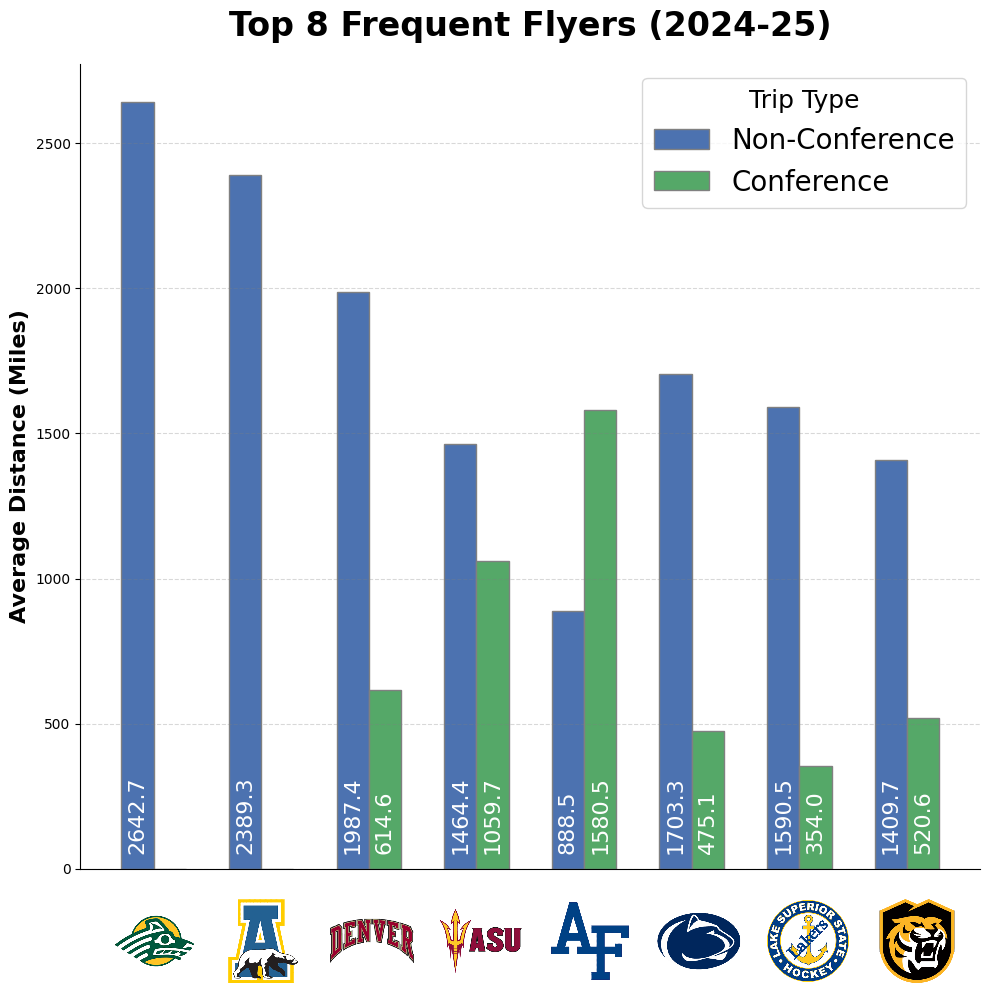

In [36]:
# RESET THE LOGO FOLDER TO THE TEAM LOGO FOLDER
logo_folder = os.path.join('..', 'images', 'logos')

# Function to calculate the average travel based on the provided logic and plot
def plot_team_travel_custom_avg(data_df, school_info_df, logo_folder, title, top=True, num_teams=8):
    """
    Plots average travel distances (conference, non-conference) for individual teams, reordering based on a custom average
    where conference teams are averaged over both types, and independent teams are based only on non-conference travel.
    
    Parameters:
    - data_df: DataFrame containing team travel data.
    - school_info_df: DataFrame containing team logo file information.
    - logo_folder: Path to the folder containing team logos.
    - title: The title for the plot.
    - top: Boolean, if True plot the top teams with most travel, if False plot the bottom teams.
    - num_teams: Number of teams to include in the plot (default is 8).
    """
    # Calculate custom average where conference average is 0, only consider non-conference
    data_df['Avg_Travel'] = data_df.apply(
        lambda row: (row['non_con_AVG'] + row['con_AVG']) / 2 if row['con_AVG'] > 0 else row['non_con_AVG'], axis=1
    )
    
    # Sort data based on this custom average
    sorted_df = data_df.sort_values(by='Avg_Travel', ascending=not top).head(num_teams)
    
    # Create a figure and axis with the same style as before
    fig, ax = plt.subplots(figsize=set_fig_size)  # Adjust size to fit 8 teams
    
    # Define bar width and positions
    bar_width = 0.3
    indices = np.arange(len(sorted_df['Team']))
    
    # Plot bars for conference and non-conference travel
    bars1 = ax.bar(indices - bar_width/2, sorted_df['non_con_AVG'], width=bar_width, color='#4C72B0', edgecolor='grey', label='Non-Conference')
    bars2 = ax.bar(indices + bar_width/2, sorted_df['con_AVG'], width=bar_width, color='#55A868', edgecolor='grey', label='Conference')
    
    # Add annotations inside the bars with rotated text
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            50,  # Static height of 50 above the x-axis
            f'{height:.1f}', 
            ha='center', 
            va='bottom', 
            rotation=90,  # Rotate text 90 degrees
            fontsize=16,  # Adjust font size for readability
            # fontweight='bold',
            color='white'  # White text inside the bars
        )
    
    # Set title with enhanced styling
    ax.set_title(title, fontsize=24, fontweight='bold', pad=20)
    
    # Set x and y labels
    ax.set_xlabel('Team', fontsize=16, fontweight='bold')
    ax.set_ylabel('Average Distance (Miles)', fontsize=label_size, fontweight='bold')
    
    # Customize x-axis ticks & Title
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_xlabel('')
    
    # Add grid lines
    ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.3)
    
    # Remove spines for a cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Customize legend with increased font size
    ax.legend(title='Trip Type', title_fontsize=18, fontsize=20, loc='upper right')

    # Alternative approach using 'axes fraction' for better positioning control
    for i, team in enumerate(sorted_df['Team']):
        logo_info = school_info_df[school_info_df['Team'] == team]
        if not logo_info.empty:
            logo_filename = logo_info['logo_abv'].values[0] + '.png'
            logo_path = os.path.join(logo_folder, logo_filename)
            
            if os.path.exists(logo_path):
                logo_img = plt.imread(logo_path)
                imagebox = OffsetImage(logo_img, zoom=0.20)
                ab = AnnotationBbox(imagebox, (i, -0.09),  # Slightly below the x-axis
                                    frameon=False,
                                    xycoords=('data', 'axes fraction'),  # This ensures logos stay at a consistent height
                                    boxcoords="offset points",
                                    pad=0)
                ax.add_artist(ab)

    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example usage: Plot for top 8 teams
plot_team_travel_custom_avg(team_df, school_info, logo_folder, title='Top 8 Frequent Flyers (2024-25)', top=True)


##### Function to check logo filepaths

In [37]:
# ######## CHECK LOGO PATHS

# # Diagnostic function to check logo paths and filenames
# def check_logo_paths(data_df, school_info_df, logo_folder):
#     """
#     Checks if the logo paths and filenames are correct and prints diagnostic information.
    
#     Parameters:
#     - data_df: DataFrame containing team travel data.
#     - school_info_df: DataFrame containing team logo file information.
#     - logo_folder: Path to the folder containing team logos.
#     """
#     missing_logos = []
    
#     for team in data_df['Team']:
#         # Get the logo filename from school_info_df
#         logo_info = school_info_df[school_info_df['Team'] == team]
#         if not logo_info.empty:
#             logo_filename = logo_info['logo_abv'].values[0] + '.png'  # Assuming logo_abv holds the filename
#             logo_path = os.path.join(logo_folder, logo_filename)
            
#             # Check if the logo file exists and print the file path
#             if os.path.exists(logo_path):
#                 print(f"Logo found for {team}: {logo_path}")
#             else:
#                 print(f"Logo NOT found for {team}: {logo_path}")
#                 missing_logos.append(team)
#         else:
#             print(f"Logo info missing for team: {team}")
#             missing_logos.append(team)
    
#     return missing_logos

# # Example diagnostic usage to check logo paths
# missing_logos = check_logo_paths(team_df, school_info, logo_folder)
# missing_logos  # Output the list of teams with missing or incorrect logos


#### Bottom 8 Teams

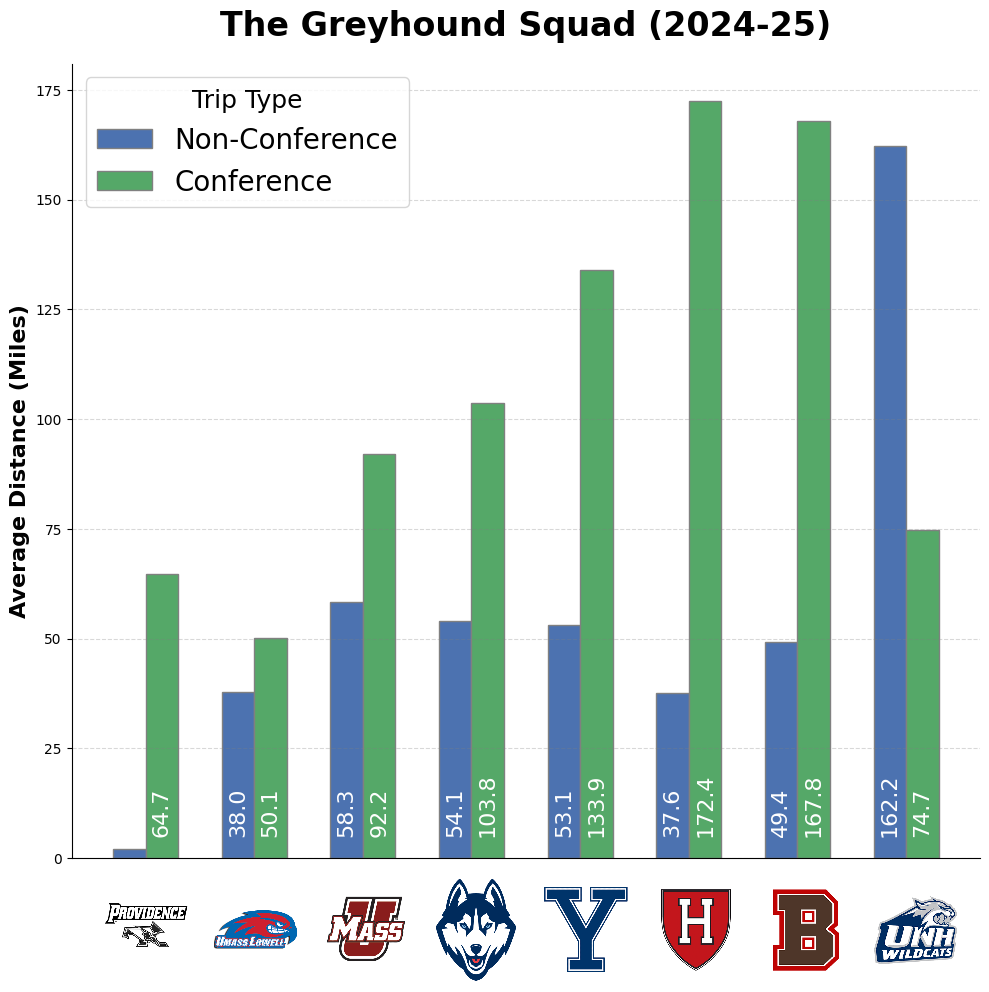

In [38]:
# Function specifically for plotting the bottom-ranked teams with adjusted annotation and layout
def plot_bottom_team_travel(data_df, school_info_df, logo_folder, title, num_teams=8):
    """
    Plots average travel distances (conference, non-conference) for the bottom-ranked teams, reordering based on a custom average
    where conference teams are averaged over both types, and independent teams are based only on non-conference travel.
    
    Parameters:
    - data_df: DataFrame containing team travel data.
    - school_info_df: DataFrame containing team logo file information.
    - logo_folder: Path to the folder containing team logos.
    - title: The title for the plot.
    - num_teams: Number of teams to include in the plot (default is 8).
    """
    # Calculate custom average where conference average is 0, only consider non-conference
    data_df['Avg_Travel'] = data_df.apply(
        lambda row: (row['non_con_AVG'] + row['con_AVG']) / 2 if row['con_AVG'] > 0 else row['non_con_AVG'], axis=1
    )
    
    # Sort data based on this custom average for the bottom teams
    sorted_df = data_df.sort_values(by='Avg_Travel', ascending=True).head(num_teams)
    
    # Create a figure and axis with the same style as before
    fig, ax = plt.subplots(figsize=set_fig_size)  # Adjust size to fit 8 teams
    
    # Define bar width and positions
    bar_width = 0.3
    indices = np.arange(len(sorted_df['Team']))
    
    # Plot bars for conference and non-conference travel
    bars1 = ax.bar(indices - bar_width/2, sorted_df['non_con_AVG'], width=bar_width, color='#4C72B0', edgecolor='grey', label='Non-Conference')
    bars2 = ax.bar(indices + bar_width/2, sorted_df['con_AVG'], width=bar_width, color='#55A868', edgecolor='grey', label='Conference')
    
    # Add annotations inside the bars with rotated text
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            5,  # Static height of 50 above the x-axis
            f'{height:.1f}', 
            ha='center', 
            va='bottom', 
            rotation=90,  # Rotate text 90 degrees
            fontsize=16,  # Adjust font size for readability
            # fontweight='bold',
            color='white'  # White text inside the bars
        )
    
    # Set title with enhanced styling
    ax.set_title(title, fontsize=24, fontweight='bold', pad=20)
    
    # Set x and y labels
    ax.set_xlabel('Team', fontsize=16, fontweight='bold')
    ax.set_ylabel('Average Distance (Miles)', fontsize=label_size, fontweight='bold')
    
    # Customize x-axis ticks & labels
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_xlabel('')
    
    # Add grid lines
    ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.3)
    
    # Remove spines for a cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Customize legend with a new position (bottom right) to avoid overlap
    ax.legend(title='Trip Type', title_fontsize=18, fontsize=20, loc='upper left')
    
    # Alternative approach using 'axes fraction' for better positioning control
    for i, team in enumerate(sorted_df['Team']):
        logo_info = school_info_df[school_info_df['Team'] == team]
        if not logo_info.empty:
            logo_filename = logo_info['logo_abv'].values[0] + '.png'
            logo_path = os.path.join(logo_folder, logo_filename)
            
            if os.path.exists(logo_path):
                logo_img = plt.imread(logo_path)
                imagebox = OffsetImage(logo_img, zoom=0.20)
                ab = AnnotationBbox(imagebox, (i, -0.09),  # Slightly below the x-axis
                                    frameon=False,
                                    xycoords=('data', 'axes fraction'),  # This ensures logos stay at a consistent height
                                    boxcoords="offset points",
                                    pad=0)
                ax.add_artist(ab)
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# New title suggestion
bottom_teams_title = 'Homebodies of College Hockey'

# Example usage: Plot for bottom 8 teams with the new layout and title
plot_bottom_team_travel(team_df, school_info, logo_folder, title='The Greyhound Squad (2024-25)', num_teams=8)


In [39]:
team_df.head()

,Team,Total_Trips,N_trips,N_total_distance,N_AVG,N_shortest,N_longest,non_con_trips,non_con_total_distance,non_con_AVG,...,non_con_longest,con_trips,con_total_distance,con_AVG,con_shortest,con_longest,Closest_Team,Closest_Distance,Total_Closest_Matches,Avg_Travel
0,Air Force,9,1,600.52,600.52,600.52,600.52,2,1777.00,888.50,...,1765.00,6,9482.68,1580.45,1316.60,1771.36,Colorado College,12.00,2,1234.475
1,Alaska,13,1,2721.99,2721.99,2721.99,2721.99,12,28671.48,2389.29,...,3275.40,0,0.00,0.00,0.00,0.00,Alaska Anchorage,260.42,6,2389.290
2,Alaska Anchorage,12,0,0.00,0.00,0.00,0.00,12,31712.55,2642.71,...,3401.37,0,0.00,0.00,0.00,0.00,Alaska,260.42,6,2642.710
3,American Intl,12,0,0.00,0.00,0.00,0.00,5,1045.97,209.19,...,565.24,7,1335.59,190.80,39.22,410.16,Massachusetts,18.77,1,199.995
4,Arizona State,10,1,1.75,1.75,1.75,1.75,3,4393.22,1464.41,...,2271.36,6,6358.26,1059.71,543.44,1563.33,Colorado College,543.44,4,1262.060


## Team Plots
- Top Ten most trave
- 10 least travel
